In [1]:
from dl_toolbox.torch_datasets import *
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

/d/pfournie/dl_toolbox/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_path='/data/AIRS/trainval/train/image/christchurch_430.tif'
label_path='/data/AIRS/trainval/train/label/christchurch_430.tif'

image_path='/data/digitanie_v2/Biarritz/Biarritz_EPSG32630_2.tif'
label_path='/data/digitanie_v2/Biarritz/COS9/Biarritz_2-v4.tif'

image_path='/d/pfournie/ai4geo/data/SemCity-Toulouse-bench/img_multispec_05/TLS_BDSD_M/TLS_BDSD_M_04.tif'
label_path='/d/pfournie/ai4geo/data/SemCity-Toulouse-bench/semantic_05/TLS_GT/TLS_GT_04_1.tif'

image_path = '/d/pfournie/ai4geo/data/miniworld_tif/christchurch/train/377_x.tif'
label_path = '/d/pfournie/ai4geo/data/miniworld_tif/christchurch/train/377_y.tif'

dict_files = {
    'IMG' : [
        '/data/toy_dataset_flair-one/train/D004_2021/Z10_AU/img/IMG_000925.tif',
        '/data/toy_dataset_flair-one/train/D006_2020/Z2_NN/img/IMG_001981.tif'
    ],
    'MSK' : [
        '/data/toy_dataset_flair-one/train/D004_2021/Z10_AU/msk/MSK_000925.tif',
        '/data/toy_dataset_flair-one/train/D006_2020/Z2_NN/msk/MSK_001981.tif'
    ]
}
        
dataset = Flair(
    #image_path=image_path,
    #label_path=label_path,
    dict_files=dict_files,
    use_metadata=False,
    #crop_size=1500,
    #crop_step=2000,
    img_aug='d4',
    #tile=Window(col_off=0, row_off=0, width=1500, height=1500),
    #fixed_crops=False,
    #one_hot=False,
    labels='13'
)

2
2


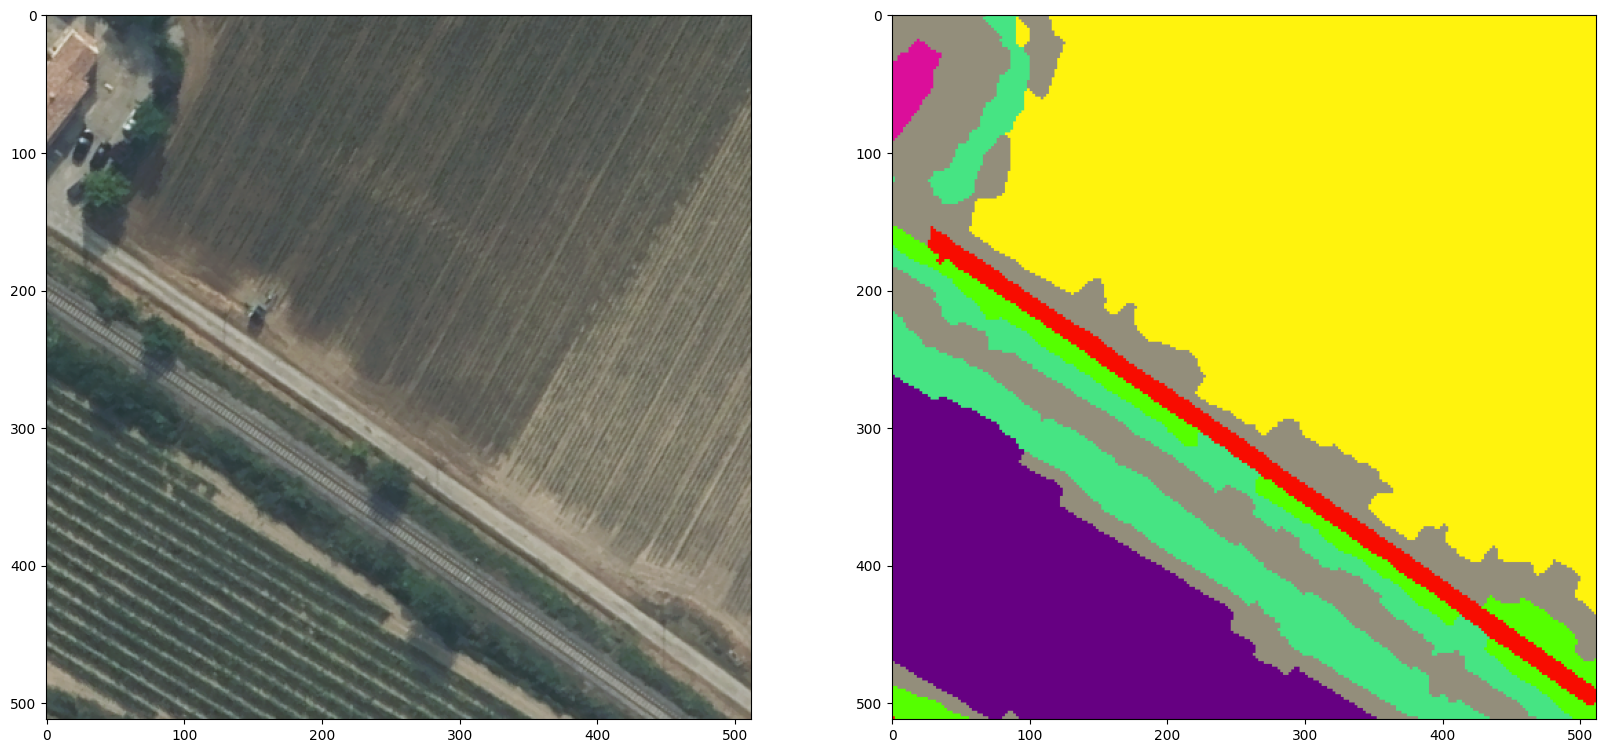

In [3]:
img = dataset[0]['image'].numpy().transpose(1,2,0)[...,:3]
# Contrast stretching
#p2, p98 = np.percentile(img, (2, 98))
#img = exposure.rescale_intensity(img, in_range=(p2, p98))

labels = dataset[0]['mask'].numpy()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax2 = fig.add_subplot(122)
ax2.imshow(dataset.labels_to_rgb(labels))

In [6]:
dataset = Subset(
    dataset=ResiscDs(
        data_path='/d/pfournie/ai4geo/data/NWPU-RESISC45',
        img_aug='d4'
    ),
    indices=[700*i+j for i in range(3,5) for j in range(8,50)]
)

Text(0.5, 1.0, '3')

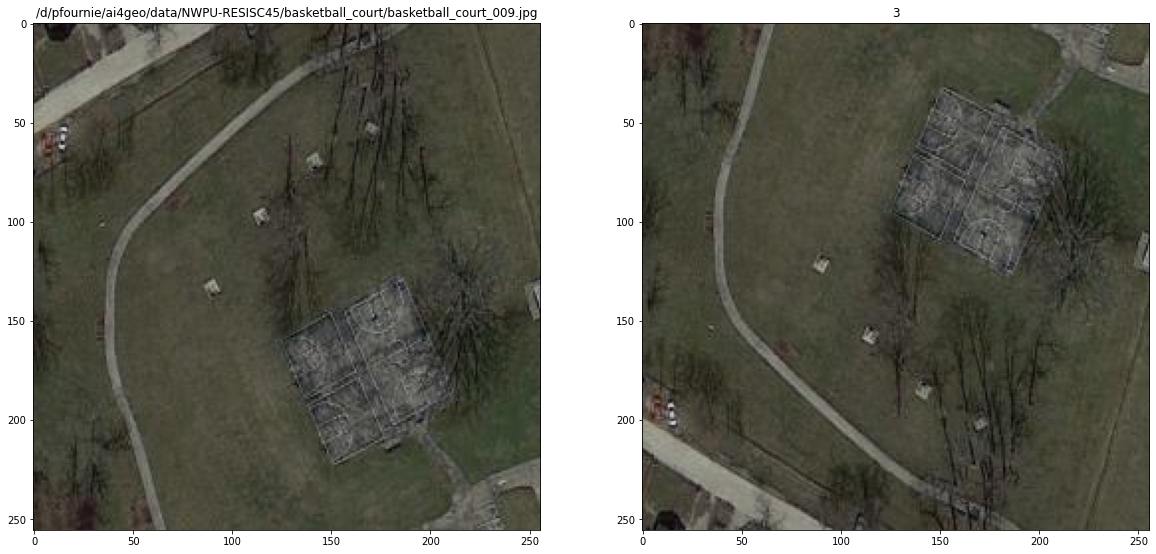

In [7]:
elem = dataset[0]
img = elem['image'].numpy().transpose(1,2,0)
orig_img = elem['orig_image'].numpy().transpose(1,2,0)

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(orig_img)
ax[1].imshow(img)
ax[0].set_title(elem['path'])
ax[1].set_title(int(elem['mask']))